In [3]:
#f([x1,x2,....xn] [w1,w2,.......,wn] + [b])<--- slope of the f(n) = f'(n)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('diabetes.csv')
data.sample(10)

data.replace([np.inf, -np.inf], np.nan, inplace= True)
data.replace([np.nan], 0, inplace = True)

X = data
Y = X['Outcome']
X.drop('Outcome', axis = 'columns', inplace = True)
X = pd.DataFrame(X)

ms = MinMaxScaler()
X = ms.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state = 5)

model = Sequential()
model.add(Dense(32, input_dim = 8, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 200, verbose = 1)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4644 - loss: 0.6988 - val_accuracy: 0.6883 - val_loss: 0.6654
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.6734 - val_accuracy: 0.6926 - val_loss: 0.6518
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6269 - loss: 0.6657 - val_accuracy: 0.6926 - val_loss: 0.6450
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6462 - loss: 0.6524 - val_accuracy: 0.6926 - val_loss: 0.6359
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6337 - loss: 0.6481 - val_accuracy: 0.6970 - val_loss: 0.6267
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6439 - loss: 0.6301 - val_accuracy: 0.7143 - val_loss: 0.6088
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6599 - loss: 0.6198 - val_accuracy: 0.7013 - val_loss: 0.6020
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6903 - loss: 0.6071 - val_accuracy: 0.7013 - 

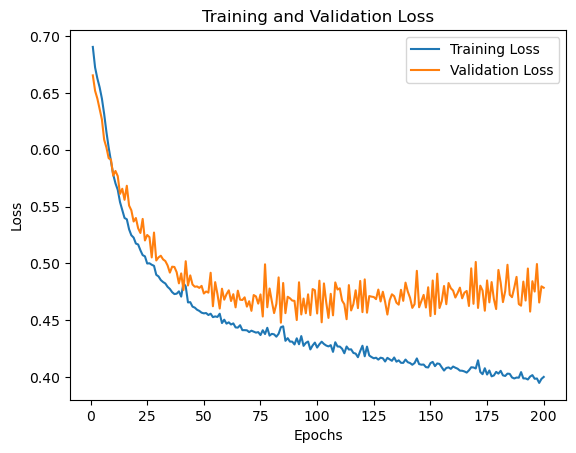

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) +1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
scores =  model.evaluate(xtrain, ytrain)
print("Training Accuracy: %.2f%%\n"% (scores[1]*100))
scores = model.evaluate(xtest, ytest)
print("Testing AccuracyL %.2f%%\n"%(scores[1]*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4212 
Training Accuracy: 81.94%

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4640 
Testing AccuracyL 79.22%

